In [13]:
import numpy as np
import matplotlib.pylab as plt
from scipy import optimize
from matplotlib.ticker import AutoMinorLocator

% matplotlib notebook

In [14]:
def plot_style(xticks=5,yticks=5):
    
    global ax
    
    plt.rc('text', usetex=True)
    #plt.rcParams['mathtext.fontset'] = 'cm'
    #plt.rcParams['mathtext.rm'] = 'serif'
    plt.rcParams.update({'figure.autolayout': True})
    plt.rcParams['ytick.direction'] = 'in'
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['axes.linewidth'] = 2
    plt.rcParams['figure.figsize'] = 8, 7.5

    fig,ax = plt.subplots()
    x_minor_locator = AutoMinorLocator(xticks)
    y_minor_locator = AutoMinorLocator(yticks)
    plt.tick_params(which='both', width=1.7)
    plt.tick_params(which='major', length=9)
    plt.tick_params(which='minor', length=5)
    ax.xaxis.set_minor_locator(x_minor_locator)
    ax.yaxis.set_minor_locator(y_minor_locator)
    ax.tick_params(axis='both', which='both', pad=8, left='on', right='on',top='on',bottom='on')

    plt.rcParams['lines.linewidth'] = 1.0
    plt.rcParams['lines.dashed_pattern'] = [6, 6] 
    plt.rcParams['lines.dashdot_pattern'] = [3, 5, 1, 5]
    plt.rcParams['lines.dotted_pattern'] = [1, 3]
    plt.rcParams['lines.scale_dashes'] = False
    plt.rcParams['errorbar.capsize'] = 6

In [15]:
def exp_fit(x,b,tau,c):
    return c+b*np.exp(-x/tau)

In [53]:
data1 = np.loadtxt('relaxation curves.dat')
data2 = np.loadtxt('relaxation_curves_rho_acc_less_1e12.dat')
x = data1[:,0]

In [54]:
num_arg = np.argmin(np.abs(data1[:,0]-1000))
print(num_arg)
num_arg2 = np.argmin(np.abs(data1[:,0]-10000))
print(num_arg2)

num_arg6 = np.argmin(np.abs(data1[:,0]-700))
print(num_arg6)

num_arg3 = np.argmin(np.abs(data1[:,0]-15))
print(num_arg2)

num_arg4 = np.argmin(np.abs(data1[:,0]-10000))
print(num_arg4)

num_arg5 = np.argmin(np.abs(data1[:,0]-15))
print(num_arg5)


1240
3096
1108
3096
3096
806


In [55]:
popt = np.zeros((3,6))
popt2 = np.zeros((3,8))
cov = np.zeros((3,3,6))
cov2 = np.zeros((3,3,8))

for i,num in zip(range(1,7),[num_arg,num_arg6,num_arg,num_arg6,num_arg,num_arg6]):
    popt[:,i-1], cov[:,:,i-1] = optimize.curve_fit(exp_fit, x[num:num_arg2], data1[num:num_arg2,i],p0=[25,2*365,109.01])

print(popt[1,:]/365)

for i,num in zip(range(1,9),[num_arg5,num_arg3,num_arg5,num_arg3,num_arg5,num_arg3,num_arg5,num_arg3]):
    popt2[:,i-1], cov2[:,:,i-1] = optimize.curve_fit(exp_fit, x[num:num_arg4], data2[num:num_arg4,i],p0=[25,2*365,109.01])

print(popt2[1,:]/365)

[ 2.12749932  5.27257007  2.00798039  4.64174021  1.7796505   3.42529749]
[ 0.72239891  0.63257826  0.85694886  0.73177549  1.05940063  0.8730127
  1.31691964  1.04304667]


<IPython.core.display.Javascript object>


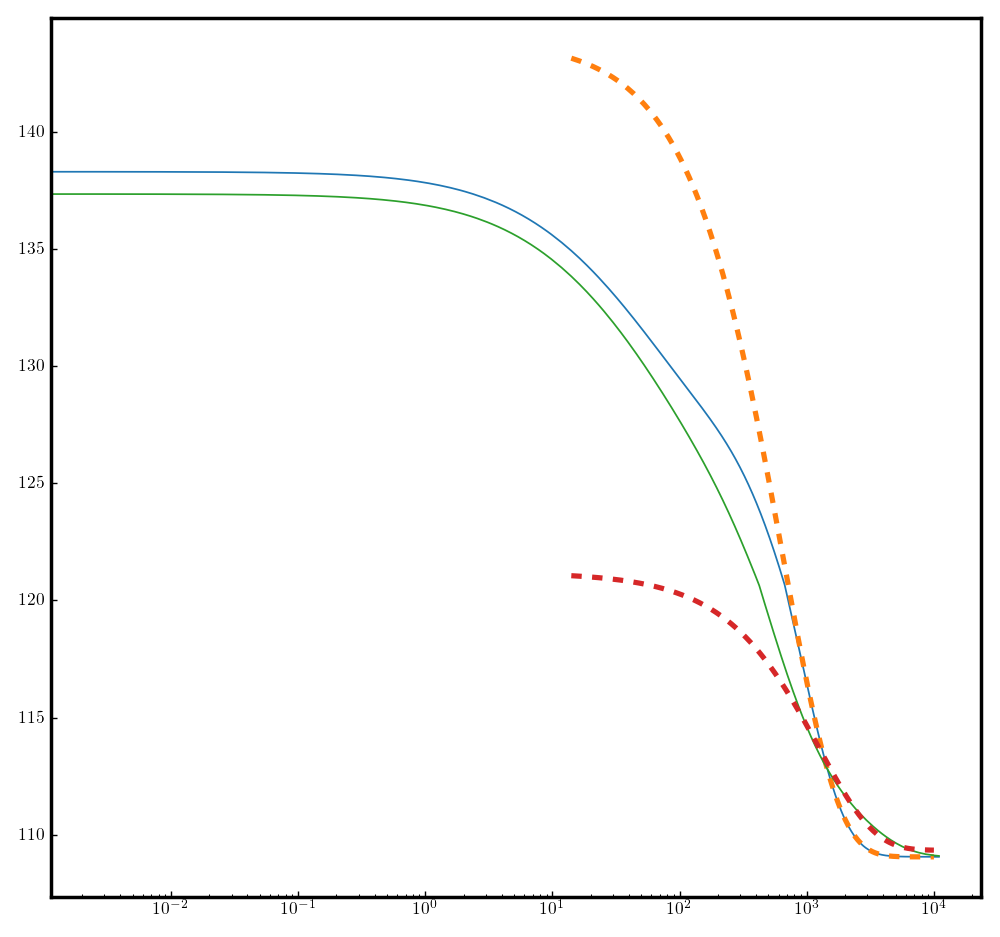

In [350]:
plt.figure(1)
plt.xscale('log')
for i in range(5,7,1):
    plt.plot(x,data1[:,i])
    plt.plot(x[num_arg3:num_arg2],exp_fit(x[num_arg3:num_arg2],*popt[:,i-1]),'--',lw=3)

<IPython.core.display.Javascript object>


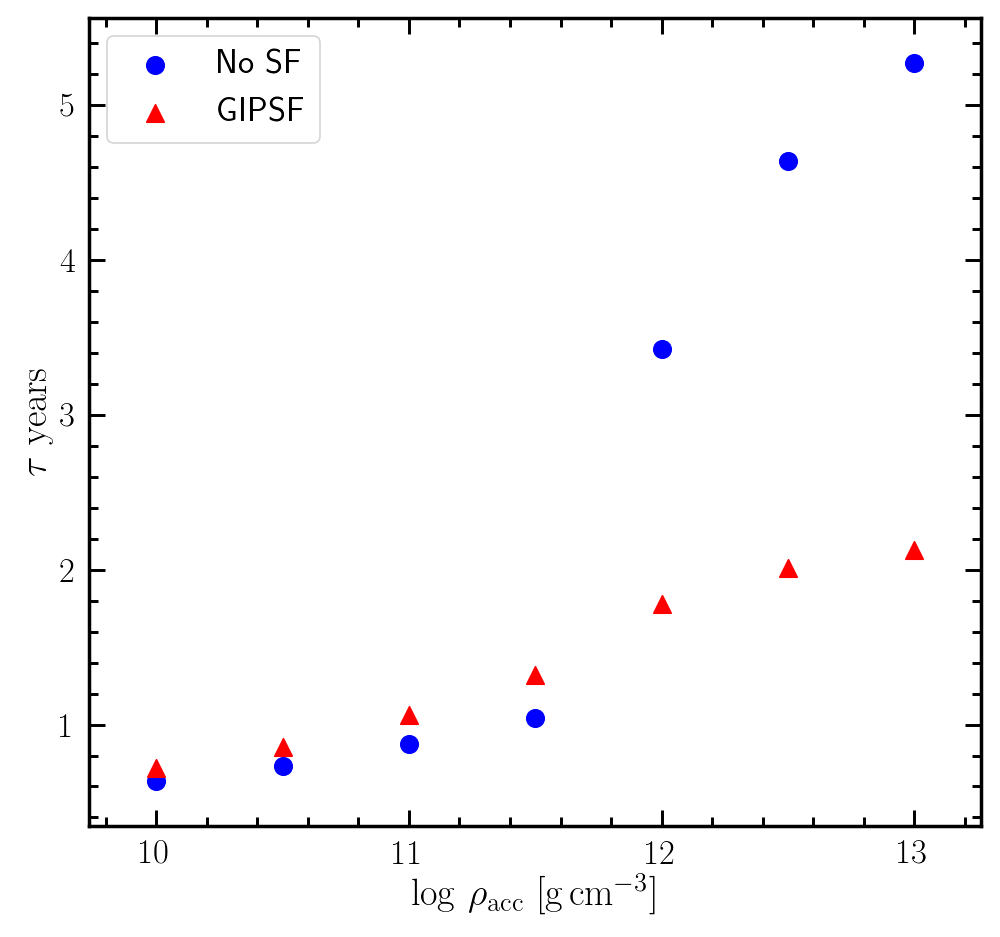

In [56]:
plot_style()
rho_array = [10,10.5,11,11.5,12,12.5,13]

t_array_SF = np.concatenate([popt2[1,::2],popt[1,::2][::-1]])/365
t_array_NO = np.concatenate([popt2[1,1::2],popt[1,1::2][::-1]])/365
error_SF = 3*np.sqrt(np.concatenate([cov2[1,1,::2],cov[1,1,::2][::-1]]))/365
error_NO = 3*np.sqrt(np.concatenate([cov2[1,1,1::2],cov[1,1,1::2][::-1]]))/365

plt.xlabel('$\\rm log$ $\\rho_{\\rm acc}$ $\\rm [ g \\thinspace cm^{-3}]$',fontsize=22)
plt.ylabel('$\\tau$ $\\rm years$',fontsize=22)

plt.xticks([10,11,12,13],fontsize=20)
plt.yticks([1,2,3,4,5,6],fontsize=20)
plt.scatter(rho_array,t_array_NO,s=100,color='b',label='No SF')
plt.scatter(rho_array,t_array_SF,s=100,marker='^',color='r',label='GIPSF')

plt.legend(loc='upper left',fontsize=20)
plt.savefig('fig_new.pdf',format='pdf')

<IPython.core.display.Javascript object>


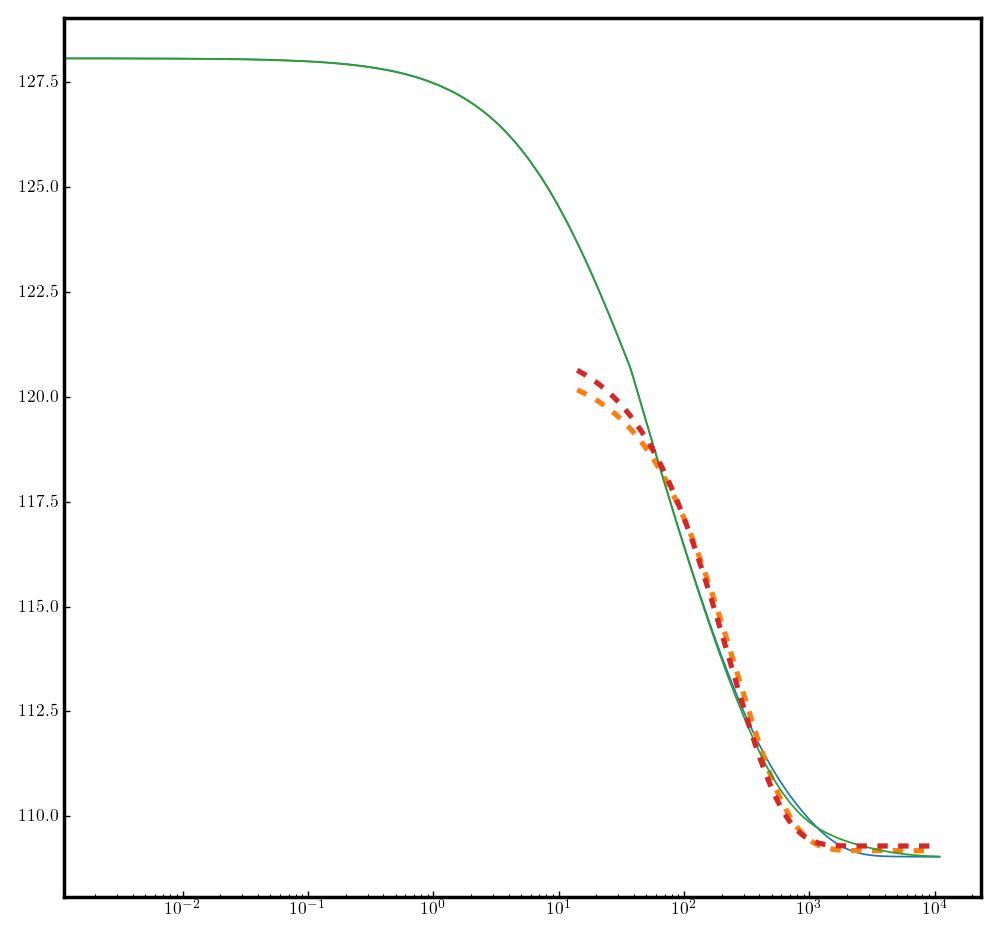

In [345]:
plt.figure(2)
plt.xscale('log')
for i in range(1,3,1):
    plt.plot(x,data2[:,i])
    plt.plot(x[num_arg3:num_arg4],exp_fit(x[num_arg3:num_arg4],*popt2[:,i-1]),'--',lw=3)

In [11]:
data3 = np.loadtxt('IGR.dat')
x = data3[:,0]

num_arg7 = np.argmin(np.abs(data3[:,0]-500))
print(num_arg7)
num_arg8 = np.argmin(np.abs(data3[:,0]-10000))
print(num_arg8)

popt3 = np.zeros((3,6))
cov3 = np.zeros((3,3,6))

for i in range(1,7):
    popt3[:,i-1], cov3[:,:,i-1] = optimize.curve_fit(exp_fit, x[num_arg7:num_arg8], data3[num_arg7:num_arg8,i],p0=[30,365,121.01],absolute_sigma=True)

print(popt3[1,:])
print(cov3[:,:,1])

1020
3096
[ 230.09111801  528.79798535  232.16525869  604.47010726  232.9968539
  631.51262028]
[[  6.07080650e-01  -8.66671544e+01   6.92248528e-03]
 [ -8.66671544e+01   1.40532350e+04  -1.62564348e+00]
 [  6.92248528e-03  -1.62564348e+00   8.02369528e-04]]


<IPython.core.display.Javascript object>


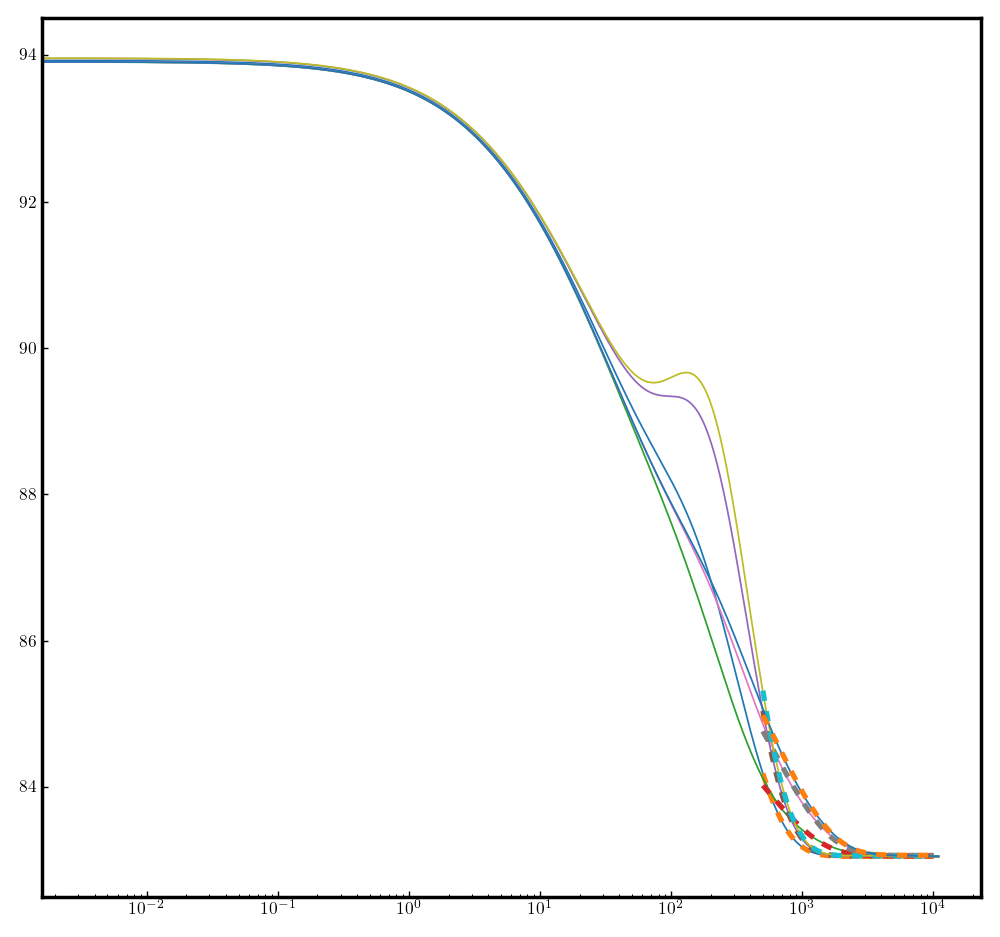

In [74]:

plt.figure(5)
plt.xscale('log')
for i in range(1,7,1):
    plt.plot(x,data3[:,i])
    plt.plot(x[num_arg7:num_arg8],exp_fit(x[num_arg7:num_arg8],*popt3[:,i-1]),'--',lw=3)

    

<IPython.core.display.Javascript object>


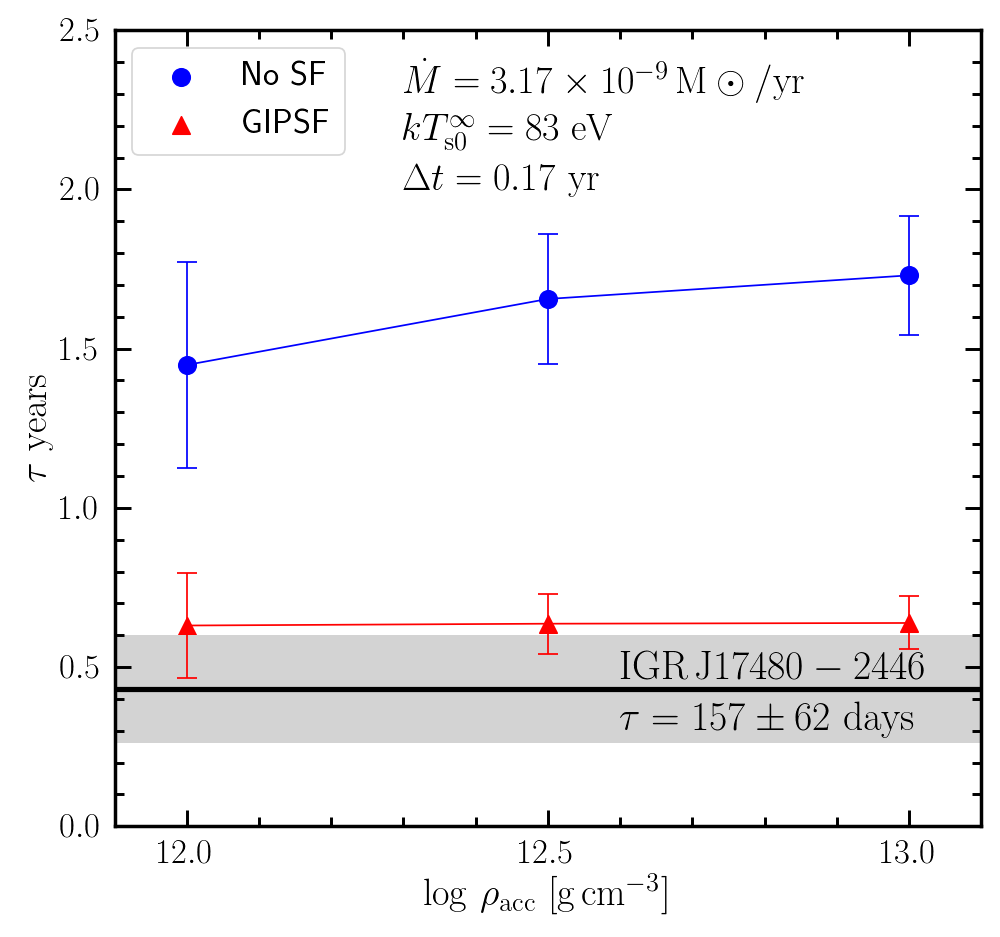

In [23]:
density = np.array([12,12.5,13])
plot_style()

plt.scatter(density,popt3[1,1::2]/365,s=100,color='b',label='No SF')
plt.scatter(density,popt3[1,::2]/365,s=100,marker='^',color='r',label='GIPSF')

error_NO = np.sqrt(cov3[1,1,1::2])/365
error_SF = np.sqrt(cov3[1,1,::2])/365

plt.errorbar(density , popt3[1,::2]/365, yerr=error_SF,color='red')
plt.errorbar(density , popt3[1,1::2]/365, yerr=error_NO,color='blue')

plt.yticks([0,0.5,1,1.5,2,2.5],fontsize=20)
plt.xticks([12,12.5,13],fontsize=20)

plt.plt.fill_between([10,12,14], np.array([95,95,95])/365, np.array([219,219,219])/365, facecolor='lightgray', interpolate=True, alpha=1)
plt.axhline(y=157/365,linewidth=3, color = 'k')
plt.text(12.6,0.47,'$\\rm IGR\\thinspace J17480-2446$',fontsize=23)
plt.text(12.6,0.3,'$\\rm \\tau = 157 \pm 62 \\thinspace \\thinspace days$',fontsize=23)

plt.text(12.3,2.3,'$\dot{M} = 3.17\\times 10^{-9} \\thinspace \\rm M \\odot / yr$',fontsize=22)
plt.text(12.3,2.12,'$kT_{\\rm s 0}^{\infty} = 83 \\thinspace \\thinspace \\rm eV$',fontsize=22)
plt.text(12.3,2.0,'$\Delta t = 0.17 \\thinspace \\thinspace \\rm yr$',fontsize=22)
    
plt.xlim(11.9,13.1)
plt.ylim(0,2.5)

plt.xlabel('$\\rm log$ $\\rho_{\\rm acc}$ $\\rm [ g \\thinspace cm^{-3}]$',fontsize=22)
plt.ylabel('$\\tau$ $\\rm years$',fontsize=22)

plt.legend(loc='upper left',fontsize=20)

plt.savefig('IGR.eps',format='eps')